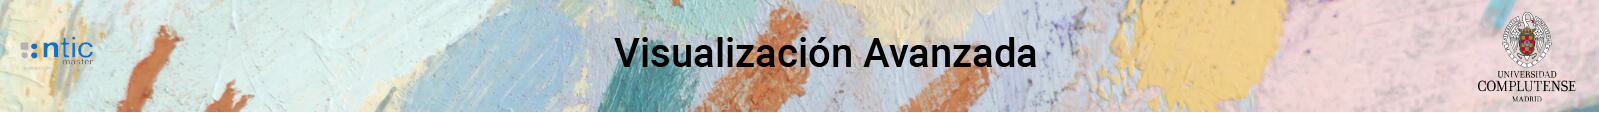

## Trabajo Fin de Módulo - Visualización Avanzada 🎨 
### Máster Big Data & Data Science - Universidad Complutense de Madrid
#### Santiago Torres Busquets

# Introducción

Los Juegos Olímpicos (JJ. OO.), Olimpiadas u Olimpíadas son el mayor evento deportivo internacional multidisciplinario en el que participan atletas de diversas partes del mundo. Los Juegos Olímpicos son considerados la principal competición del mundo deportivo, con más de doscientas naciones participantes. Existen dos tipos: los Juegos Olímpicos de Verano y los Juegos Olímpicos de Invierno, que actualmente se realizan con un intervalo de dos años entre sí.

Los Juegos Olímpicos modernos se inspiraron en los Juegos Olímpicos de la antigüedad del siglo VIII a. C. organizados en la antigua Grecia con sede en la ciudad de Olimpia, realizados entre los años 776 a. C. y el 393 de nuestra era. La primera edición de los llamados Juegos Olímpicos de la era moderna se llevó a cabo en Atenas, capital de Grecia, a partir del 6 de abril de 1896. Desde aquella oportunidad, han sido realizados cada cuatro años en diversas ciudades del mundo, siendo las únicas excepciones las ediciones de 1916, 1940 y 1944, debido al estallido de la Primera y Segunda Guerra Mundial; así como la postergación de la de 2020 para 2021, debido a la pandemia de COVID-19.

Para el presente trabajo, se extrajo información de un dataset referido a los Juegos Olímpicos desde el inicio de los Juegos Olímpicos modernos, es decir desde Atenas 1896 hasta Río 2016 inclusive.
Dentro de este dataset podemos encontrar información referida a los distintos atletas, y sus resultados dentro de una amplia variedad de disciplinas olímpicas, así como características físicas de los competidores.

El dataset utilizado para la entrega del módulo fue extraído de la plataforma Kaggle en:
https://www.kaggle.com/datasets/heesoo37/120-years-of-olympic-history-athletes-and-results
y cuenta con licencia CC0 1.0, que es de dominio público.

## 1. Importación de librerías 📚

In [1]:
# Datos
import pandas as pd
import numpy as np

# Visualización Estática
import matplotlib.pyplot as plt
import seaborn as sns

# Visualización Dinámica - Interactiva
import plotly.express as px
import io
from bokeh.io import output_notebook, show
from bokeh.models import ColumnDataSource, HoverTool
from bokeh.sampledata.autompg import autompg_clean as df
from bokeh.transform import factor_cmap
from bokeh.plotting import figure, show
from bokeh.sampledata.stocks import MSFT
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Mapas
from geopy.geocoders import Nominatim
import geopandas as gpd
import folium
import os
os.environ['USE_PYGEOS'] = '0'

# Warnings
import warnings
warnings.filterwarnings("ignore")

C:\Users\Santiago\anaconda3\lib\site-packages\geopandas\_compat.py:123: UserWarning: The Shapely GEOS version (3.11.1-CAPI-1.17.1) is incompatible with the GEOS version PyGEOS was compiled with (3.10.4-CAPI-1.16.2). Conversions between both will be slow.
  warnings.warn(
C:\Users\Santiago\AppData\Local\Temp\ipykernel_11044\3439747789.py:23: UserWarning: Shapely 2.0 is installed, but because PyGEOS is also installed, GeoPandas will still use PyGEOS by default for now. To force to use and test Shapely 2.0, you have to set the environment variable USE_PYGEOS=0. You can do this before starting the Python process, or in your code before importing geopandas:

import os
os.environ['USE_PYGEOS'] = '0'
import geopandas

In a future release, GeoPandas will switch to using Shapely by default. If you are using PyGEOS directly (calling PyGEOS functions on geometries from GeoPandas), this will then stop working and you are encouraged to migrate from PyGEOS to Shapely 2.0 (https://shapely.readthedocs

## 2. Lectura de Datos 🔢

In [2]:
datos = pd.read_csv('athlete_events.csv')
regiones = pd.read_csv('noc_regions.csv')

In [3]:
datos.head(3)

ID                 Name Sex   Age  Height  Weight     Team  NOC  \
0   1            A Dijiang   M  24.0   180.0    80.0    China  CHN   
1   2             A Lamusi   M  23.0   170.0    60.0    China  CHN   
2   3  Gunnar Nielsen Aaby   M  24.0     NaN     NaN  Denmark  DEN   

         Games  Year  Season       City       Sport  \
0  1992 Summer  1992  Summer  Barcelona  Basketball   
1  2012 Summer  2012  Summer     London        Judo   
2  1920 Summer  1920  Summer  Antwerpen    Football   

                          Event Medal  
0   Basketball Men's Basketball   NaN  
1  Judo Men's Extra-Lightweight   NaN  
2       Football Men's Football   NaN

In [4]:
regiones.head(3)

NOC       region                 notes
0  AFG  Afghanistan                   NaN
1  AHO      Curacao  Netherlands Antilles
2  ALB      Albania                   NaN

Este dataset contiene dos tablas, que voy a unir en el campo 'NOC', que corresponde al National Olympic Committee.

In [5]:
df = pd.merge(datos, regiones, on='NOC', how='left')

In [6]:
df.head(3)

ID                 Name Sex   Age  Height  Weight     Team  NOC  \
0   1            A Dijiang   M  24.0   180.0    80.0    China  CHN   
1   2             A Lamusi   M  23.0   170.0    60.0    China  CHN   
2   3  Gunnar Nielsen Aaby   M  24.0     NaN     NaN  Denmark  DEN   

         Games  Year  Season       City       Sport  \
0  1992 Summer  1992  Summer  Barcelona  Basketball   
1  2012 Summer  2012  Summer     London        Judo   
2  1920 Summer  1920  Summer  Antwerpen    Football   

                          Event Medal   region notes  
0   Basketball Men's Basketball   NaN    China   NaN  
1  Judo Men's Extra-Lightweight   NaN    China   NaN  
2       Football Men's Football   NaN  Denmark   NaN

## 3. Exploratory Data Analysis 🔎

**Análisis de la estructura de los datos**

In [7]:
df.shape

(271116, 17)

El dataset contiene 271 mil filas y 17 columnas.

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 271116 entries, 0 to 271115
Data columns (total 17 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      271116 non-null  int64  
 1   Name    271116 non-null  object 
 2   Sex     271116 non-null  object 
 3   Age     261642 non-null  float64
 4   Height  210945 non-null  float64
 5   Weight  208241 non-null  float64
 6   Team    271116 non-null  object 
 7   NOC     271116 non-null  object 
 8   Games   271116 non-null  object 
 9   Year    271116 non-null  int64  
 10  Season  271116 non-null  object 
 11  City    271116 non-null  object 
 12  Sport   271116 non-null  object 
 13  Event   271116 non-null  object 
 14  Medal   39783 non-null   object 
 15  region  270746 non-null  object 
 16  notes   5039 non-null    object 
dtypes: float64(3), int64(2), object(12)
memory usage: 37.2+ MB


**Valores nulos**

In [9]:
df.isna().sum()

ID             0
Name           0
Sex            0
Age         9474
Height     60171
Weight     62875
Team           0
NOC            0
Games          0
Year           0
Season         0
City           0
Sport          0
Event          0
Medal     231333
region       370
notes     266077
dtype: int64

### Transformaciones

In [10]:
# Pasar a minúsculas todos los nombres de columna para manipularlos más fácilmente
df.columns = df.columns.str.lower()

In [11]:
print(df.year.dtype)

int64


Columnas a quitar:
- **team**: en las primeras ediciones los países tenían nombres para los equipos que se presentaban a competir, por lo que el campo 'region' estandariza esta columna etiquetando solamente a los países.
- **games**: es una columna que contiene el año y la temporada de los JJ.OO (verano o invierno). Las columnas year y season contienen la misma información de forma separada y nos será más útil para nuestro análisis.
- **noc**: National Olympic Committee, sigla internacional de tres letras que no nos servirá para las visualizaciones.
- **notes**: comentarios acerca de algún país en concreto, no aporta mucha información.

In [12]:
# Columnas a quitar
cols_to_drop = ['team','noc','games','notes']

# Elimino las columnas seleccionadas
df = df.drop(cols_to_drop, axis=1)

In [13]:
df.head()

id                      name sex   age  height  weight  year  season  \
0   1                 A Dijiang   M  24.0   180.0    80.0  1992  Summer   
1   2                  A Lamusi   M  23.0   170.0    60.0  2012  Summer   
2   3       Gunnar Nielsen Aaby   M  24.0     NaN     NaN  1920  Summer   
3   4      Edgar Lindenau Aabye   M  34.0     NaN     NaN  1900  Summer   
4   5  Christine Jacoba Aaftink   F  21.0   185.0    82.0  1988  Winter   

        city          sport                             event medal  \
0  Barcelona     Basketball       Basketball Men's Basketball   NaN   
1     London           Judo      Judo Men's Extra-Lightweight   NaN   
2  Antwerpen       Football           Football Men's Football   NaN   
3      Paris     Tug-Of-War       Tug-Of-War Men's Tug-Of-War  Gold   
4    Calgary  Speed Skating  Speed Skating Women's 500 metres   NaN   

        region  
0        China  
1        China  
2      Denmark  
3      Denmark  
4  Netherlands

In [14]:
df.shape

(271116, 13)

In [15]:
df.describe()

id            age         height         weight  \
count  271116.000000  261642.000000  210945.000000  208241.000000   
mean    68248.954396      25.556898     175.338970      70.702393   
std     39022.286345       6.393561      10.518462      14.348020   
min         1.000000      10.000000     127.000000      25.000000   
25%     34643.000000      21.000000     168.000000      60.000000   
50%     68205.000000      24.000000     175.000000      70.000000   
75%    102097.250000      28.000000     183.000000      79.000000   
max    135571.000000      97.000000     226.000000     214.000000   

                year  
count  271116.000000  
mean     1978.378480  
std        29.877632  
min      1896.000000  
25%      1960.000000  
50%      1988.000000  
75%      2002.000000  
max      2016.000000

## 4. Visualizaciones 📊

### 4.1 Evolución de cantidad de atletas participantes a lo largo de los años.

In [16]:
# Separo los JJ.OO según la temporada
verano = df[df.season=='Summer']
invierno = df[df.season=='Winter']

In [17]:
# Agrupo por nombre del atleta
atletas_verano = verano.groupby(['year', 'sex'])['name'].nunique().reset_index()
atletas_invierno = invierno.groupby(['year', 'sex'])['name'].nunique().reset_index()

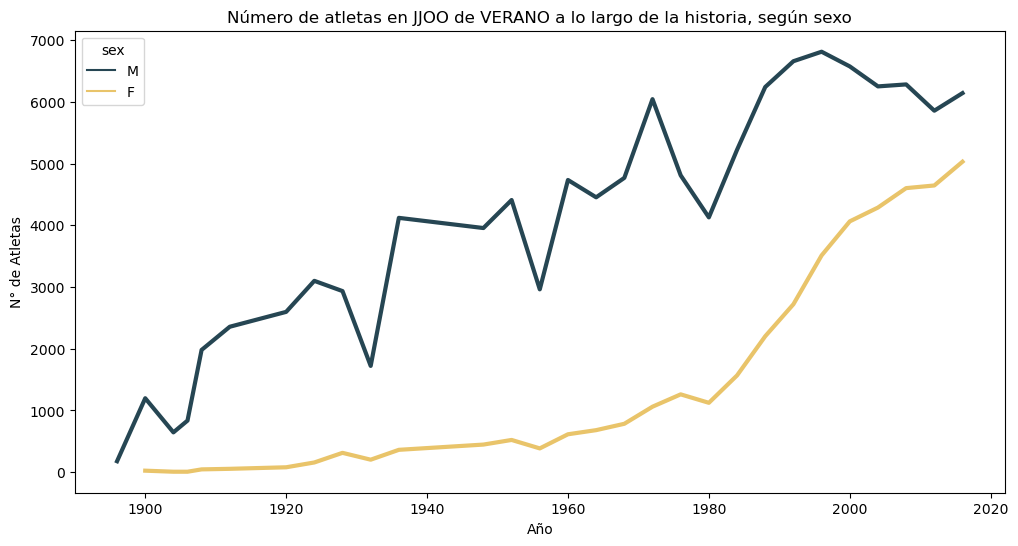

In [18]:
# Paleta personalizada
hue_colors = {"M": "#264653", "F": "#e9c46a"}

# Tamaño del gráfico
fig, ax = plt.subplots(figsize=(12, 6))

# Line plot
g = sns.lineplot(data=atletas_verano, x='year', y='name', hue='sex', palette=hue_colors, linewidth=3)
plt.title('Número de atletas en JJOO de VERANO a lo largo de la historia, según sexo')
g.set(xlabel="Año",
ylabel="N° de Atletas")
plt.show()

Podemos observar como el número de participantes de los Juegos Olímpicos ha experimentado un crecimiento exponencial, y que siempre hubo un mayor número de participantes masculinos que femeninos, aunque esta brecha parece haberse acortado significativamente en las últimas dos décadas.   

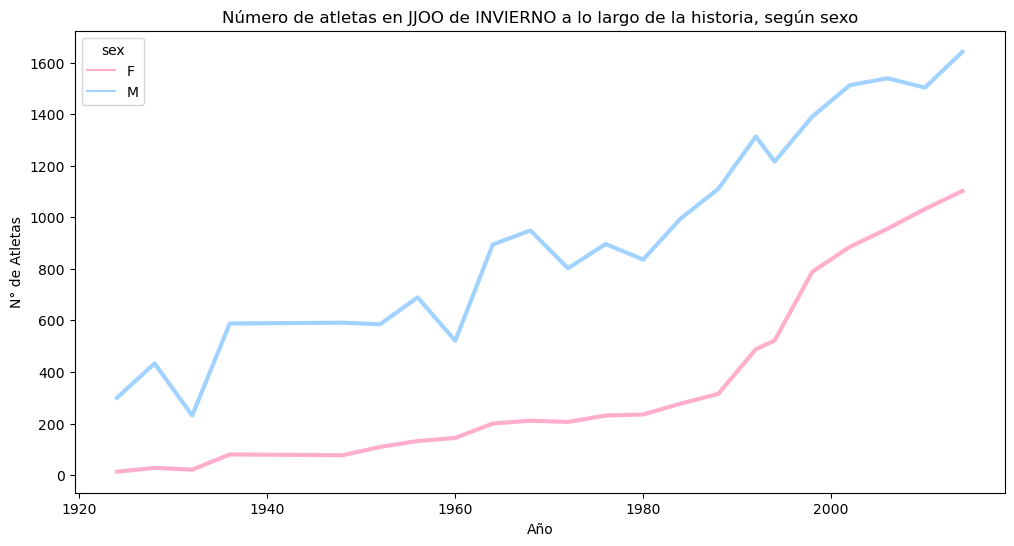

In [19]:
# Paleta personalizada
hue_colors = {"M": "#a2d2ff", "F": "#ffafcc"}

# Tamaño del gráfico
fig, ax = plt.subplots(figsize=(12, 6))

# Line plot
g = sns.lineplot(data=atletas_invierno, x='year', y='name', hue='sex', palette=hue_colors, linewidth=3)
plt.title('Número de atletas en JJOO de INVIERNO a lo largo de la historia, según sexo')
g.set(xlabel="Año", ylabel="N° de Atletas")
plt.show()

También podemos ver una clara tendencia positiva en cuanto al número de participantes en Juegos Olímpicos de invierno, aunque dicha cantidad sea significativamente menor que a su equivalente de verano. Se repite el patrón que habíamos observado en el gráfico anterior de un mayor número de atletas masculino que femeninos.

### 4.2 Análisis de características físicas de los atletas olímpicos

In [20]:
# Realizo un filtro del dataset para obtener pesos y alturas
peso_y_altura = df[(df.weight.isnull()==False) & (df.height.isnull()==False)].groupby(['id']).mean()
peso_y_altura2 = peso_y_altura.merge(df, on='id').reset_index()

<Figure size 1200x1000 with 0 Axes>

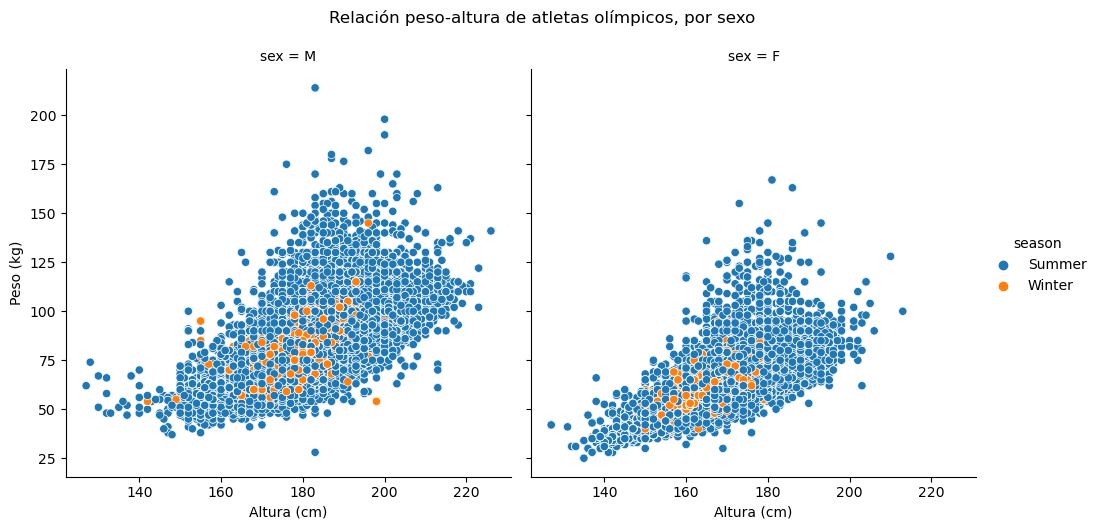

In [21]:
# Creo el scatter plot por peso y altura, separando en columnas por sexo y pintando por temporada
plt.figure(figsize=(12, 10))
g = sns.relplot(data=peso_y_altura2, x="height_y", y="weight_y", col='sex',hue='season')
plt.suptitle('Relación peso-altura de atletas olímpicos, por sexo', y=1.05)
g.set(xlabel="Altura (cm)", ylabel="Peso (kg)")
plt.show()

Podemos observar en el presente gráfico la relación entre altura y peso de los atletas olímpicos a lo largo de la historia. Sin embargo, este gráfico no hace más que destacar que en general los hombres tienen un mayor número de individuos participando, con alturas que superan los 2m (o 200 cm) y no así las mujeres, y lo mismo sucede con el peso, donde hay un gran número de atletas que superan los 100/120 kg y no así las mujeres.

Para obtener mejores *insights* sobre la altura de los deportistas, será mejor su análisis en base a los resultados obtenidos y/o la disciplina que realizan, ya que habrá deportes en los que la altura y el peso tiene un papel fundamental y otros en donde no lo sea.

### 4.3 Paises mas ganadores de medallas

In [22]:
# Separo los atletas ganadores de medallas
medallistas = df.dropna(subset=['medal'])
medallistas.medal.value_counts()

Gold      13372
Bronze    13295
Silver    13116
Name: medal, dtype: int64

In [23]:
# agrupo medallas por país
medalla_por_pais = medallistas.groupby(['region','medal'])['id'].nunique().reset_index()

In [24]:
# paso el df a tipo wide
medalla_por_pais_wide = medalla_por_pais.pivot(index='region', columns='medal', values='id').fillna(0)

In [25]:
medalla_por_pais_wide = medalla_por_pais_wide.reindex(columns=['Gold', 'Silver', 'Bronze'])

In [26]:
# añado una columna de total para poder extraer el top 10
medalla_por_pais_wide['Total'] = medalla_por_pais_wide[['Gold', 'Silver', 'Bronze']].sum(axis=1)
top10_ganadores_por_pais = medalla_por_pais_wide.sort_values(by='Total', ascending=False).head(10)

In [27]:
# defino color por medalla
colors = {'Gold': 'gold', 'Silver': 'silver', 'Bronze': 'peru'}

# gráfico de barras apilado por medalla
fig = px.bar(top10_ganadores_por_pais, 
             x=top10_ganadores_por_pais.index, 
             y=["Gold", "Silver", "Bronze"],
             color_discrete_map=colors,
             labels={'value':'N° Medallas', 'region':'País'}, 
             title="Top 10 países más ganadores")
fig.update_layout(
    title_x=0.5
)

fig.show()

Podemos observar que Estados Unidos es el país más ganador de los Juegos Olímpicos a lo largo de la historia, con Alemania y Russia completando el podio. En este caso Rusia incorpora las medallas de la antigua Unión Soviética. De este top 10 de países más ganadores podemos observar que en su mayoría son países que tienen una gran población o territorio, con la excepción de Suecia que apenas supera los 10 millones de habitantes en el presente año. 

### 4.4 Ciudades Sede

In [28]:
# Extraigo el nombre de las ciudades que fueron sede de JJ.OO
cities = df['city'].unique()
cities = pd.DataFrame(cities)
cities = cities.rename(columns={cities.columns[0]: 'City'})

In [29]:
# Echo un vistazo al df resultante
df

id                      name sex   age  height  weight  year  \
0            1                 A Dijiang   M  24.0   180.0    80.0  1992   
1            2                  A Lamusi   M  23.0   170.0    60.0  2012   
2            3       Gunnar Nielsen Aaby   M  24.0     NaN     NaN  1920   
3            4      Edgar Lindenau Aabye   M  34.0     NaN     NaN  1900   
4            5  Christine Jacoba Aaftink   F  21.0   185.0    82.0  1988   
...        ...                       ...  ..   ...     ...     ...   ...   
271111  135569                Andrzej ya   M  29.0   179.0    89.0  1976   
271112  135570                  Piotr ya   M  27.0   176.0    59.0  2014   
271113  135570                  Piotr ya   M  27.0   176.0    59.0  2014   
271114  135571        Tomasz Ireneusz ya   M  30.0   185.0    96.0  1998   
271115  135571        Tomasz Ireneusz ya   M  34.0   185.0    96.0  2002   

        season            city          sport  \
0       Summer       Barcelona     Basketball   
1       Summer          London           Judo   
2       Summer       Antwerpen       Football   
3       Summer           Paris     Tug-Of-War   
4       Winter         Calgary  Speed Skating   
...        ...             ...            ...   
271111  Winter       Innsbruck           Luge   
271112  Winter           Sochi    Ski Jumping   
271113  Winter           Sochi    Ski Jumping   
271114  Winter          Nagano      Bobsleigh   
271115  Winter  Salt Lake City      Bobsleigh   

                                           event medal       region  
0                    Basketball Men's Basketball   NaN        China  
1                   Judo Men's Extra-Lightweight   NaN        China  
2                        Football Men's Football   NaN      Denmark  
3                    Tug-Of-War Men's Tug-Of-War  Gold      Denmark  
4               Speed Skating Women's 500 metres   NaN  Netherlands  
...                                          ...   ...          ...  
271111                Luge Mixed (Men)'s Doubles   NaN       Poland  
271112  Ski Jumping Men's Large Hill, Individual   NaN       Poland  
271113        Ski Jumping Men's Large Hill, Team   NaN       Poland  
271114                      Bobsleigh Men's Four   NaN       Poland  
271115                      Bobsleigh Men's Four   NaN       Poland  

[271116 rows x 13 columns]

In [30]:
# Utilizo libreria geopy para obtener coordenadas de las ciudades para ubicar en el mapa

# Create a geocoder instance using Nominatim
geolocator = Nominatim(user_agent='olympics_map')

# Create a new map centered on the world
olympics_map = folium.Map(location=[0, 0], zoom_start=2)

# Add a title to the map
title_html = '''
             <h3 align="center" style="font-size:20px"><b>Ciudades Sede Olímpicas</b></h3>
             '''
olympics_map.get_root().html.add_child(folium.Element(title_html))

# Group the DataFrame by city and year
grouped_df = df.groupby(['city', 'year']).size().reset_index()

# Iterate over the grouped DataFrame
for index, row in grouped_df.iterrows():
    city = row['city']
    year = row['year']

    # Geocode the city name to retrieve its coordinates
    location = geolocator.geocode(city)

    if location:
        latitude = location.latitude
        longitude = location.longitude

        # Create a marker for each city
        marker = folium.Marker(
            location=[latitude, longitude],
            popup=f"{city}, {year}"
        )
        marker.add_to(olympics_map)

# Display the map
olympics_map


Del gráfico observamos que la mayoría de los JJ.OO fueron organizados por países europeos. Un menor número de ocasiones fue anfitrión Norteamérica, Asia y solo un par de veces Australia. Sudamérica ha organizado solo una edición de los JJ.OO en el año 2016 en Rio de Janeiro, Brasil.

### 4.5 Treemap con continentes-países más ganadores en JJOO

In [31]:
medalla_por_pais_wide = medalla_por_pais_wide.reset_index()
# Le asigno el continente a cada país del dataset
continentes = ['Asia','Africa','South America','Asia','Oceania','Europe','Europe','North America','Asia','North America','Europe','Europe','North America','Africa','South America','Europe','Africa','Africa','North America','South America','Asia','South America','North America','Europe','North America','South America','Europe','Europe','Europe','Africa','North America','South America','Africa','Africa','Europe','Africa','Oceania','Europe','Europe','Africa','Europe','Europe','Africa','Europe','North America','North America','South America','North America','Europe','Europe','Asia','NaN','Asia','Asia','Asia','Europe','Asia','Europe','Africa','North America','Asia','Asia','Asia','Africa','Europe','Asia','Asia','Europe','Asia','Europe','Europe','Europe','Europe','Asia','Africa','North America','Europe','Europe','Asia','Europe','Africa','Africa','Africa','Africa','Europe','Oceania','Africa','Africa','Asia','Europe','Asia','North America','South America','South America','Asia','Europe','Europe','North America','Asia','Europe','Europe','Asia','Africa','Europe','Europe','Europe','Africa','Asia','Europe','Asia','Africa','South America','Europe','Europe','Asia','Asia','Asia','Africa','Asia','Africa','Oceania','South America','Africa','Asia','Europe','North America','Africa','Europe','Asia','South America','Asia','South America','Asia','North America','Africa','Africa']
# Lo añado al dataset
medalla_por_pais_wide['continent'] = continentes

In [32]:
# Df resultante de agregar los continentes para el treemap
medalla_por_pais_wide

medal              region   Gold  Silver  Bronze   Total      continent
0             Afghanistan    0.0     0.0     1.0     1.0           Asia
1                 Algeria    5.0     3.0     8.0    16.0         Africa
2               Argentina   90.0    90.0    78.0   258.0  South America
3                 Armenia    2.0     5.0     9.0    16.0           Asia
4               Australia  287.0   383.0   434.0  1104.0        Oceania
..                    ...    ...     ...     ...     ...            ...
131             Venezuela    2.0     3.0    10.0    15.0  South America
132               Vietnam    1.0     3.0     0.0     4.0           Asia
133    Virgin Islands, US    0.0     1.0     0.0     1.0  North America
134                Zambia    0.0     1.0     1.0     2.0         Africa
135              Zimbabwe   16.0     1.0     1.0    18.0         Africa

[136 rows x 6 columns]

In [33]:
fig = px.treemap(medalla_por_pais_wide, path=[px.Constant("World"), 'continent', 'region'], values='Total',
                  color='Total', hover_data=['Gold','Silver','Bronze'],
                  color_continuous_scale='RdPu')
fig.update_layout(margin = dict(t=50, l=25, r=25, b=25),title='Treemap países más ganadores',title_x=0.5)
fig.show()

De este *treemap* podemos observar a que Europa a nivel continental es el mayor ganador de JJOO a nivel global, debiendo considerar además que el por una cuestión geográfica tiene muchos países compitiendo, tanto en disciplinas de olimpiadas de verano como de invierno, cuando en otros continentes como los africanos o americanos no tienen tan alta participación (a excepción de unos pocos países). Sin embargo EE.UU es el mayor dominador de los JJ.OO en la historia.

### 4.6 Variación de edad por edición de JJOO

In [34]:
unique_ids = df.drop_duplicates(subset='id')

In [35]:
hombres = unique_ids[unique_ids.sex=='M']

In [36]:
mujeres = unique_ids[unique_ids.sex=='F']

In [37]:
hombres_medallistas = hombres[hombres.medal.isin(['Gold','Silver','Bronze'])]
mujeres_medallistas = mujeres[mujeres.medal.isin(['Gold','Silver','Bronze'])]

In [38]:
fig = px.box(hombres_medallistas, y="age",x='year',color='season')
fig.update_layout(title='Distribucion de edad en medallistas masculinos', title_x=0.5)
fig.show()

In [39]:
fig = px.box(mujeres_medallistas, y="age",x='year',color='season')
fig.update_layout(title='Distribucion de edad en medallistas femeninos', title_x=0.5)
fig.show()

Para ambos *boxplots* se observa una tendencia a disminuir la amplitud etárea en cuanto a los medallistas olímpicos (atletas que han conseguido ganar una medalla), tanto en hombres como mujeres. Esto puede deberse a la profesionalización del deporte en las últimas décadas, donde los deportistas desde muy jóvenes se dedican profesionalmente a competir, con entrenamientos hiperexigentes que quizás no era el caso en las primeras ediciones de los juegos olímpicos.

También a lo largo de la historia de los JJ.OO, los deportes fueron cambiando: aparecieron nuevas disciplinas y desaparecieron muchas otras también. En las últimas ediciones se incorporaron deportes como el skateboard, el baloncesto tipo 3 vs 3, entre otros. A su vez desaparecieron deportes o disciplinas como la pelota basca, el tira y afloja, el pentatlon, etc. 

Además, hubo competiciones artísticas que formaron parte de JJ.OO hasta 1948, como la pintura o la escultura, donde artistas podían ser medallistas olímpicos en su vejez, o incluso, póstumamente. Véase (https://olympstats.com/2014/08/27/posthumous-olympians/)

### 4.7 Distribución de edad de medallistas

In [40]:
hombres_medallistas_oro = hombres[hombres.medal.isin(['Gold'])]
hombres_medallistas_plata = hombres[hombres.medal.isin(['Silver'])]
hombres_medallistas_bronce = hombres[hombres.medal.isin(['Bronze'])]

In [41]:
mujeres_medallistas_oro = mujeres[mujeres.medal.isin(['Gold'])]
mujeres_medallistas_plata = mujeres[mujeres.medal.isin(['Silver'])]
mujeres_medallistas_bronce = mujeres[mujeres.medal.isin(['Bronze'])]

In [42]:
import plotly.subplots as sp

fig = sp.make_subplots(rows=3, cols=1, subplot_titles=("Oro", "Plata", "Bronce"))

# Gold Medalists
fig.add_trace(
    go.Histogram(x=hombres_medallistas_oro["age"], nbinsx=30, opacity=0.7, name='Oro'),
    row=1,
    col=1
)
fig.update_xaxes(title_text="Edad", row=1, col=1)
fig.update_yaxes(title_text="Cantidad", row=1, col=1)

# Silver Medalists
fig.add_trace(
    go.Histogram(x=hombres_medallistas_plata["age"], nbinsx=40, opacity=0.7, name='Plata'),
    row=2,
    col=1
)
fig.update_xaxes(title_text="Edad", row=2, col=1)
fig.update_yaxes(title_text="Cantidad", row=2, col=1)

# Bronze Medalists
fig.add_trace(
    go.Histogram(x=hombres_medallistas_bronce["age"], nbinsx=40, opacity=0.7, name='Bronce'),
    row=3,
    col=1
)
fig.update_xaxes(title_text="Edad", row=3, col=1)
fig.update_yaxes(title_text="Cantidad", row=3, col=1)

fig.update_layout(
    title_text="Distribucion de Edad para Medallistas Masculinos",
    bargap=0.1,
    height=900,  title_x=0.5
)

fig.show()

In [43]:
fig = sp.make_subplots(rows=3, cols=1, subplot_titles=("Oro", "Plata", "Bronce"))

# Gold Medalists
fig.add_trace(
    go.Histogram(x=mujeres_medallistas_oro["age"], nbinsx=40, opacity=0.7, name='Oro'),
    row=1,
    col=1
)
fig.update_xaxes(title_text="Edad", row=1, col=1)
fig.update_yaxes(title_text="Cantidad", row=1, col=1)

# Silver Medalists
fig.add_trace(
    go.Histogram(x=mujeres_medallistas_plata["age"], nbinsx=40, opacity=0.7, name='Plata'),
    row=2,
    col=1
)
fig.update_xaxes(title_text="Edad", row=2, col=1)
fig.update_yaxes(title_text="Cantidad", row=2, col=1)

# Bronze Medalists
fig.add_trace(
    go.Histogram(x=mujeres_medallistas_bronce["age"], nbinsx=40, opacity=0.7, name='Bronce'),
    row=3,
    col=1
)
fig.update_xaxes(title_text="Edad", row=3, col=1)
fig.update_yaxes(title_text="Cantidad", row=3, col=1)

fig.update_layout(
    title_text="Distribucion de Edad para Medallistas Femininas",
    bargap=0.1,
    height=900, title_x=0.5
)  

fig.show()

De los gráficos anteriores podemos concluir que la edad más propicia para obtener una medalla en Juegos Olímpicos a lo largo de la historia se da entre los **22 y 23 años**, tanto para el oro, la plata o el bronce, indistintamente para hombres y mujeres. Siendo a continuación los **24 a 25 años** la segunda mejor edad y de **20 a 21** la tercera. De todas formas, este análisis es teniendo en cuenta todas las disciplinas olímpicas y claro está que no todas se benefician de la edad de la misma forma, dado que un deportista que compite en atletismo puede beneficiarse de una agilidad y ligereza física a una menor edad y un atleta que compita en disciplinas de tiro al blanco puede no serle tan influyente.

Para este fin, más adelante procederemos a analizar por deporte cúales son aquellos que tienen una menor y mayor edad *en promedio*, y lo mismo con su peso y altura.

### 4.8 Promedios de altura y peso por disciplina olímpica

**Filtro del dataset según las medidas deseadas para lás gráficas**

In [44]:
hombres_verano = hombres[hombres.season=='Summer']
hombres_invierno = hombres[hombres.season=='Winter']
mujeres_verano = mujeres[mujeres.season=='Summer']
mujeres_invierno = mujeres[mujeres.season=='Winter']

In [45]:
top_deportes_altura_hombres_verano = ((hombres_verano.groupby(['sport'])['height'].mean()).sort_values(ascending=False).head())
top_deportes_peso_hombres_verano = ((hombres_verano.groupby(['sport'])['weight'].mean()).sort_values(ascending=False).head())
top_deportes_edad_hombres_verano = ((hombres_verano.groupby(['sport'])['age'].mean()).sort_values(ascending=False).head())

In [46]:
top_deportes_altura_hombres_invierno = ((hombres_invierno.groupby(['sport'])['height'].mean()).sort_values(ascending=False).head())
top_deportes_peso_hombres_invierno = ((hombres_invierno.groupby(['sport'])['weight'].mean()).sort_values(ascending=False).head())
top_deportes_edad_hombres_invierno = ((hombres_invierno.groupby(['sport'])['age'].mean()).sort_values(ascending=False).head())

In [47]:
top_deportes_altura_mujeres_verano = ((mujeres_verano.groupby(['sport'])['height'].mean()).sort_values(ascending=False).head())
top_deportes_peso_mujeres_verano = ((mujeres_verano.groupby(['sport'])['weight'].mean()).sort_values(ascending=False).head())
top_deportes_edad_mujeres_verano = ((mujeres_verano.groupby(['sport'])['age'].mean()).sort_values(ascending=False).head())

In [48]:
top_deportes_altura_mujeres_invierno = ((mujeres_invierno.groupby(['sport'])['height'].mean()).sort_values(ascending=False).head())
top_deportes_peso_mujeres_invierno = ((mujeres_invierno.groupby(['sport'])['weight'].mean()).sort_values(ascending=False).head())
top_deportes_edad_mujeres_invierno = ((mujeres_invierno.groupby(['sport'])['age'].mean()).sort_values(ascending=False).head())

In [49]:
# Create subplots with 4 rows and 3 columns
fig = make_subplots(rows=4, cols=3)

# Define data and titles for each subplot
subplots_data = [
    (top_deportes_altura_hombres_verano, 'Altura (cm)', 'Deporte Verano (Hombres)'),
    (top_deportes_peso_hombres_verano, 'Peso (kg)', ''),
    (top_deportes_edad_hombres_verano, 'Edad (años)', ''),
    (top_deportes_altura_mujeres_verano, 'Altura (cm)', 'Deporte Verano (Mujeres)'),
    (top_deportes_peso_mujeres_verano, 'Peso (kg)', ''),
    (top_deportes_edad_mujeres_verano, 'Edad (años)', ''),
    (top_deportes_altura_hombres_invierno, 'Altura (cm)', 'Deporte Invierno (Hombres)'),
    (top_deportes_peso_hombres_invierno, 'Peso (kg)', ''),
    (top_deportes_edad_hombres_invierno, 'Edad (años)', ''),
    (top_deportes_altura_mujeres_invierno, 'Altura (cm)', 'Deporte Invierno (Mujeres)'),
    (top_deportes_peso_mujeres_invierno, 'Peso (kg)', ''),
    (top_deportes_edad_mujeres_invierno, 'Edad (años)', '')
]

# Add traces to the subplots
for i, (data, x_title, y_title) in enumerate(subplots_data):
    row = (i // 3) + 1
    col = (i % 3) + 1
    fig.add_trace(
        go.Bar(
            x=data.values,
            y=data.index,
            orientation='h'
        ),
        row=row, col=col
    )

    # Set x-axis and y-axis titles
    fig.update_xaxes(title_text=x_title, row=row, col=col, title_font=dict(size=10))
    fig.update_yaxes(title_text=y_title, row=row, col=col, title_font=dict(size=10))

# Set layout options for the subplots
fig.update_layout(
    title='Deportes con mayor altura, peso y edad en promedio, en hombres y mujeres, de verano e invierno',
    height=800,
    width=1200,
    showlegend=False,
    font=dict(size=10), title_x=0.5
)

# Reverse the y-axis range for appropriate ordering of bars
fig.update_yaxes(autorange="reversed")

# Show the plot
fig.show()


A la luz de los gráficos anteriores, podemos observar:

- El baloncesto es el deporte que mayor altura presenta en promedio para deportes de invierno, tanto en hombres (> 194 cm) como mujeres(> 182 cm) y el bobleigh para deportes de invierno (tanto en altura como en peso)
- El Tug-Of-War (o tira y afloja) que supo ser deporte olímpico masculino tenía en promedio competidores de 94 kg.
- Las competiciones de arte son las disciplinas que tienen mayor promedio de edad al no requerir una detreza física de alto rendimiento. También al Roque y al Croquet, deportes antiguos ya en desuso.

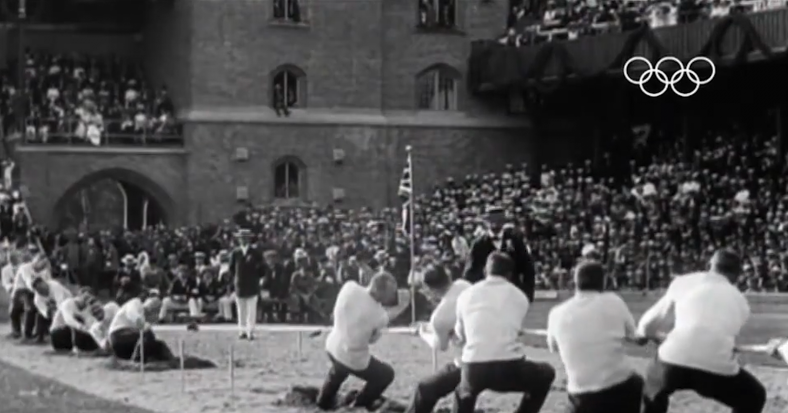

_Tug-Of-War. Great Britain vs Sweden, 1912 Olympics._

### 4.9 Disciplinas más practicadas

In [50]:
deportes_mas_practicados_h_v = ((hombres_verano.groupby(['sport'])['name'].count()).sort_values(ascending=False).head(10))
deportes_mas_practicados_m_v = (mujeres_verano.groupby(['sport'])['name'].count()).sort_values(ascending=False).head(10)
deportes_mas_practicados_h_i = (hombres_invierno.groupby(['sport'])['name'].count()).sort_values(ascending=False).head(10)
deportes_mas_practicados_m_i = (mujeres_invierno.groupby(['sport'])['name'].count()).sort_values(ascending=False).head(10)

In [51]:
from bokeh.plotting import figure, show
from bokeh.io import output_notebook
from bokeh.models import ColumnDataSource, HoverTool
from bokeh.palettes import Category10, Spectral
from bokeh.layouts import gridplot

# Convert Series to DataFrame for men's data (verano)
data_df_men_v = deportes_mas_practicados_h_v.to_frame(name='Count').reset_index()
data_df_men_v['color'] = Category10[len(data_df_men_v)]

# Convert Series to DataFrame for women's data (verano)
data_df_women_v = deportes_mas_practicados_m_v.to_frame(name='Count').reset_index()
data_df_women_v['color'] = Category10[len(data_df_women_v)]

# Convert Series to DataFrame for men's data (invierno)
data_df_men_i = deportes_mas_practicados_h_i.to_frame(name='Count').reset_index()
data_df_men_i['color'] = Spectral[len(data_df_men_i)]

# Convert Series to DataFrame for women's data (invierno)
data_df_women_i = deportes_mas_practicados_m_i.to_frame(name='Count').reset_index()
data_df_women_i['color'] = Spectral[len(data_df_women_i)]

# Configure Bokeh for displaying in the notebook
output_notebook()

# Create a ColumnDataSource for men's data (verano)
source_men_v = ColumnDataSource(data=data_df_men_v)

# Create a ColumnDataSource for women's data (verano)
source_women_v = ColumnDataSource(data=data_df_women_v)

# Create a ColumnDataSource for men's data (invierno)
source_men_i = ColumnDataSource(data=data_df_men_i)

# Create a ColumnDataSource for women's data (invierno)
source_women_i = ColumnDataSource(data=data_df_women_i)

# Create a figure for men's data (verano)
p_men_v = figure(x_range=data_df_men_v['sport'], title='Deportes de verano con mayor número de atletas hombres', plot_height=400, plot_width=450)
p_men_v.vbar(x='sport', top='Count', width=0.7, source=source_men_v, fill_color='color', line_color='white', alpha=0.8, hover_fill_alpha=0.5, hover_line_alpha=1.0)
p_men_v.xaxis.major_label_orientation = 45
p_men_v.xaxis.axis_label = 'Sport'
p_men_v.yaxis.axis_label = 'Count'
p_men_v.xgrid.grid_line_color = None
p_men_v.ygrid.grid_line_color = None
p_men_v.background_fill_color = '#F5F5F5'
hover_men_v = HoverTool(tooltips=[('Count', '@Count')], mode='vline')
p_men_v.add_tools(hover_men_v)

# Create a figure for women's data (verano)
p_women_v = figure(x_range=data_df_women_v['sport'], title='Deportes de verano con mayor número de atletas mujeres', plot_height=400, plot_width=450)
p_women_v.vbar(x='sport', top='Count', width=0.7, source=source_women_v, fill_color='color', line_color='white', alpha=0.8, hover_fill_alpha=0.5, hover_line_alpha=1.0)
p_women_v.xaxis.major_label_orientation = 45
p_women_v.xaxis.axis_label = 'Sport'
p_women_v.yaxis.axis_label = 'Count'
p_women_v.xgrid.grid_line_color = None
p_women_v.ygrid.grid_line_color = None
p_women_v.background_fill_color = '#F5F5F5'
hover_women_v = HoverTool(tooltips=[('Count', '@Count')], mode='vline')
p_women_v.add_tools(hover_women_v)

# Create a figure for men's data (invierno)
p_men_i = figure(x_range=data_df_men_i['sport'], title='Deportes de invierno con mayor número de atletas hombres', plot_height=400, plot_width=450)
p_men_i.vbar(x='sport', top='Count', width=0.7, source=source_men_i, fill_color='color', line_color='white', alpha=0.8, hover_fill_alpha=0.5, hover_line_alpha=1.0)
p_men_i.xaxis.major_label_orientation = 45
p_men_i.xaxis.axis_label = 'Sport'
p_men_i.yaxis.axis_label = 'Count'
p_men_i.xgrid.grid_line_color = None
p_men_i.ygrid.grid_line_color = None
p_men_i.background_fill_color = '#F5F5F5'
hover_men_i = HoverTool(tooltips=[('Count', '@Count')], mode='vline')
p_men_i.add_tools(hover_men_i)

# Create a figure for women's data (invierno)
p_women_i = figure(x_range=data_df_women_i['sport'], title='Deportes de invierno con mayor número de atletas mujeres', plot_height=400, plot_width=450)
p_women_i.vbar(x='sport', top='Count', width=0.7, source=source_women_i, fill_color='color', line_color='white', alpha=0.8, hover_fill_alpha=0.5, hover_line_alpha=1.0)
p_women_i.xaxis.major_label_orientation = 45
p_women_i.xaxis.axis_label = 'Sport'
p_women_i.yaxis.axis_label = 'Count'
p_women_i.xgrid.grid_line_color = None
p_women_i.ygrid.grid_line_color = None
p_women_i.background_fill_color = '#F5F5F5'
hover_women_i = HoverTool(tooltips=[('Count', '@Count')], mode='vline')
p_women_i.add_tools(hover_women_i)

# Arrange the plots in a grid layout
grid = gridplot([[p_men_v, p_women_v], [p_men_i, p_women_i]])

# Show the grid layout
show(grid)


Loading BokehJS ...

In [52]:
df.event[df.sport=='Athletics'].value_counts()

Athletics Men's Marathon                     2093
Athletics Men's 100 metres                   1936
Athletics Men's 4 x 100 metres Relay         1910
Athletics Men's 4 x 400 metres Relay         1749
Athletics Men's 200 metres                   1495
                                             ... 
Athletics Men's 4,000 metres Steeplechase       8
Athletics Men's Shot Put, Both Hands            7
Athletics Men's All-Around Championship         7
Athletics Men's 2,590 metres Steeplechase       7
Athletics Men's 2,500 metres Steeplechase       6
Name: event, Length: 83, dtype: int64

En los deportes de **verano**, la disciplina que reúne un mayor número de atletas es el atletismo, por la amplia variedad de subdisciplinas. Durante estos 120 años de historia olímpica que analizamos, se llevaron a cabo 83 tipos de pruebas de atletismo.

En los deportes de **invierno** en hombres, el hockey sobre hielo reúne el mayor número de atletas, y en mujeres el esquí alpino.

### 4.10 Mapa medallero

In [53]:
from plotly import tools
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)

trace = go.Choropleth(
            locations = medalla_por_pais_wide['region'],
            locationmode='country names',
            z = medalla_por_pais_wide['Total'],
            text = medalla_por_pais_wide['region'],
            autocolorscale =False,
            reversescale = True,
            colorscale = 'ice',
            marker = dict(
                line = dict(
                    color = 'rgb(0,0,0)',
                    width = 0.5)
            ),
            colorbar = dict(
                title = 'Medallas',
                tickprefix = '')
        )

data = [trace]
layout = go.Layout(
    title = dict(
        text = 'Mapa Cloroplético por Medallas Olímpicas',
        x = 0.5,
        y = 0.95
    ),
    geo = dict(
        showframe = True,
        showlakes = False,
        showcoastlines = True,
        projection = dict(
            type = 'robinson'
        )
    ),
    height=600,
    width=1000 
)

fig = dict( data=data, layout=layout )
iplot(fig)

En este mapa cloroplético trato de imitar la información presentada en el treemap anterior, con los países mas ganadores siendo EE.UU, Rusia y Alemania, con Europa siendo el continente más presente en el medallero. 

### 4.11 Mapa según altura y peso promedio

In [54]:
paises_por_altura = df.groupby(['region'])['height'].mean().reset_index()
paises_por_peso = df.groupby(['region'])['weight'].mean().reset_index()

In [55]:
trace = go.Choropleth(
            locations = paises_por_altura['region'],
            locationmode='country names',
            z = paises_por_altura['height'],
            text = paises_por_altura['region'],
            autocolorscale =False,
            reversescale = True,
            colorscale = 'balance',
            marker = dict(
                line = dict(
                    color = 'rgb(0,0,0)',
                    width = 0.5)
            ),
            colorbar = dict(
                title = 'Altura (cm)',
                tickprefix = '')
        )

data = [trace]
layout = go.Layout(
    title = dict(
        text = 'Mapa Cloroplético por Altura Promedio de atletas',
        x = 0.5,
        y = 0.95
    ),
    geo = dict(
        showframe = True,
        showlakes = False,
        showcoastlines = True,
        projection = dict(
            type = 'robinson'
        )
    ),
    height=600,
    width=1000    
)

fig = dict( data=data, layout=layout )
iplot(fig)

Al observar la altura promedio de los atletas a nivel mundial, se detecta que los países con mayor altura promedio están en Europa del Este y sorpredentemente en Mali en Africa (quizás habría que revisar cuantos atletas participan por Mali y en qué disciplina) con alturas medias superiores al 1,8 m. Luego vemos que Asia del este/sudeste presenta muchas regiones con alturas menores a 1,7 m, destacándose Corea del Norte con una media de 1,61 m.

In [56]:
trace = go.Choropleth(
            locations = paises_por_peso['region'],
            locationmode='country names',
            z = paises_por_peso['weight'],
            text = paises_por_peso['region'],
            autocolorscale =False,
            reversescale = True,
            colorscale = 'PuOr_r',
            marker = dict(
                line = dict(
                    color = 'rgb(0,0,0)',
                    width = 0.5)
            ),
            colorbar = dict(
                title = 'Peso (kg)',
                tickprefix = '')
        )

data = [trace]
layout = go.Layout(
    title = dict(
        text = 'Mapa Cloroplético por Peso Promedio de atletas',
        x = 0.5,
        y = 0.95
    ),
    geo = dict(
        showframe = True,
        showlakes = False,
        showcoastlines = True,
        projection = dict(
            type = 'robinson'
        )
    ),
    height=600,
    width=1000 
)

fig = dict( data=data, layout=layout )
iplot(fig)

Patrones similares encontramos en el peso promedio de los atletas a nivel mundial. El primer gráfico de dispersión de este trabajo enseña que hay una clara relación lineal positiva entre altura y peso, por lo tanto aquellas naciones de estatura promedio baja, también presentan un peso medio bajo, sobretodo en asia del este/sudeste (y en ciertos países africanos) y aquellos con mayor peso promedio se encuentran en Europa Central o del Este.

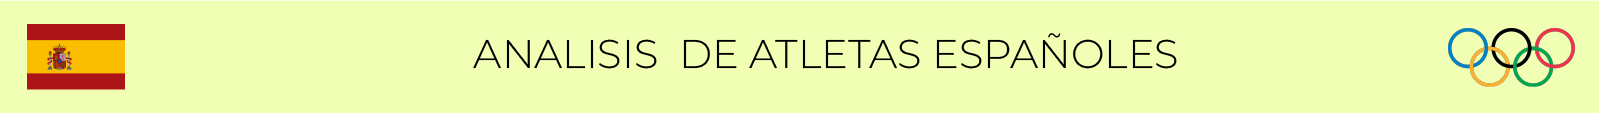

### 4.12 Heatmap de participación por deportes

In [57]:
spain_summer = verano[verano.region=='Spain']

In [58]:
spanish_athletes_summer = spain_summer.groupby(['sport','year'])['id'].count().reset_index()

In [59]:
# Pivot the DataFrame
pivot_df = pd.pivot_table(spanish_athletes_summer, values='id', index='sport', columns='year', aggfunc='sum')

# Fill NaN values with 0
pivot_df.fillna(0, inplace=True)

# Create the heatmap
heatmap = go.Heatmap(z=pivot_df.values, x=pivot_df.columns, y=pivot_df.index)

# Define the layout
layout = go.Layout(
    title='Participación de Atletas Españoles en deportes de verano en la historia',
    xaxis=dict(title='Año'),
    yaxis=dict(title='Deporte'),
    height=800
)

# Create the figure
fig = go.Figure(data=heatmap, layout=layout)

# Display the heatmap
fig.show()


Dentro de las disciplinas de verano, en España se puede observar una gran participación en deportes de: 
- **Atletismo**
- **Gimnasia**
- **Hockey**
- **Natación**
- **Handball**

entre otras. Llama la atención la alta participación en *shooting* del año 1920.

In [60]:
spain_winter = invierno[invierno.region=='Spain']

In [61]:
spanish_athletes_winter = spain_winter.groupby(['sport','year'])['id'].count().reset_index()

In [62]:
# Pivot the DataFrame
pivot_df = pd.pivot_table(spanish_athletes_winter, values='id', index='sport', columns='year', aggfunc='sum')

# Fill NaN values with 0
pivot_df.fillna(0, inplace=True)

# Create the heatmap
heatmap = go.Heatmap(z=pivot_df.values, x=pivot_df.columns, y=pivot_df.index, colorscale='Blues',reversescale=True)

# Define the layout
layout = go.Layout(
    title='Participación de Atletas Españoles en deportes de invierno en la historia',
    xaxis=dict(title='Año'),
    yaxis=dict(title='Deporte'),
    height=600
)

# Create the figure
fig = go.Figure(data=heatmap, layout=layout)

# Display the heatmap
fig.show()

En deportes de invierno, España participa mayoritariamente en **Alpine Skiing** y **Cross Country Skiing**.

### 4.13 Medallas de España en JJ.OO. de Verano

In [63]:
# Step 3: Filter the dataset for Spain in Summer Olympics and different medal types
Spain_medalla_verano_oro = df[(df['region'] == 'Spain') & (df['season'] == 'Summer') & (df['medal'] == 'Gold')]
Spain_medalla_verano_plata = df[(df['region'] == 'Spain') & (df['season'] == 'Summer') & (df['medal'] == 'Silver')]
Spain_medalla_verano_bronce = df[(df['region'] == 'Spain') & (df['season'] == 'Summer') & (df['medal'] == 'Bronze')]

# Step 4: Group by year and count medals for each type separately
medal_counts_summer_gold = Spain_medalla_verano_oro.groupby('year').size().reset_index(name='Medal Count Gold')
medal_counts_summer_silver = Spain_medalla_verano_plata.groupby('year').size().reset_index(name='Medal Count Silver')
medal_counts_summer_bronze = Spain_medalla_verano_bronce.groupby('year').size().reset_index(name='Medal Count Bronze')

# Step 5: Create line plots using Plotly
fig = go.Figure()

fig.add_trace(go.Scatter(x=medal_counts_summer_gold['year'], y=medal_counts_summer_gold['Medal Count Gold'],
                    mode='lines+markers', name='Oro',
                    marker=dict(color='gold', size=6),
                    line=dict(color='gold')))

fig.add_trace(go.Scatter(x=medal_counts_summer_silver['year'], y=medal_counts_summer_silver['Medal Count Silver'],
                    mode='lines+markers', name='Plata',
                    marker=dict(color='silver', size=6),
                    line=dict(color='silver')))

fig.add_trace(go.Scatter(x=medal_counts_summer_bronze['year'], y=medal_counts_summer_bronze['Medal Count Bronze'],
                    mode='lines+markers', name='Bronce',
                    marker=dict(color='peru', size=6),
                    line=dict(color='peru')))

fig.update_layout(title='Medallas obtenidas por España en JJOO de Verano',
                xaxis_title='Año',
                yaxis_title='Medallas',
                plot_bgcolor='rgba(240, 240, 240, 0.8)',title_x=0.5)

fig.show()


Podemos observar la evolución del medallero español a lo largo de los años, siendo 1992 y 2008 las ediciones con mayores resultados, aunque debería considerarse que los deportes en grupo deberían sumar de manera individual, y no contar aquellos en donde se entrega más de una medalla por tratarse de equipos, como en el baloncesto o fútbol.

### 4.14 Atletas españoles más ganadores

In [64]:
medallas = df[df['medal'].isin(['Gold', 'Silver', 'Bronze'])]
mas_ganadores = medallas.name.value_counts(ascending=False).head().reset_index()

In [65]:
esp_medalla = df[(df['region'] == 'Spain') & (df['medal'].isin(['Gold', 'Silver', 'Bronze']))]
mas_ganadores_esp = esp_medalla.name.value_counts(ascending=False).head().reset_index()

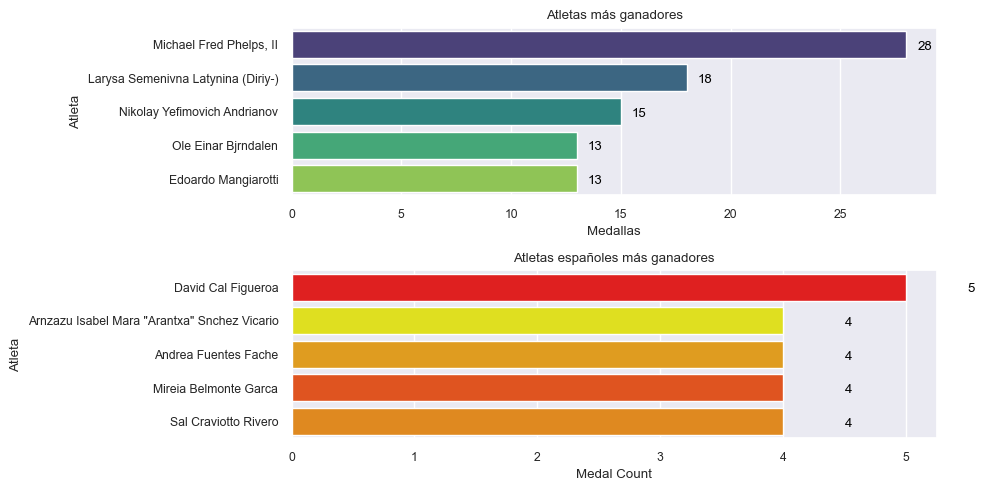

In [66]:
# Define the custom color palette for Spain
custom_palette_spain = ["#FF0000", "#FFFF00", "#FFA500", "#FF4500", "#FF8C00"]

# Set the font size for the markers
sns.set(font_scale=0.8)

# Create a figure with two subplots and adjust the size
fig, axes = plt.subplots(2, 1, figsize=(10, 5))

# Plot for the top athletes in the world
sns.barplot(y='index', x='name', data=mas_ganadores, palette='viridis', ax=axes[0])
axes[0].set_xlabel('Medallas')
axes[0].set_ylabel('Atleta')
axes[0].set_title('Atletas más ganadores')

# Annotate values for the top athletes in the world
for i, v in enumerate(mas_ganadores['name']):
    axes[0].text(v + 0.5, i + 0.15, str(v), color='black')

# Plot for the top athletes in Spain
sns.barplot(y='index', x='name', data=mas_ganadores_esp, palette=custom_palette_spain, ax=axes[1])
axes[1].set_xlabel('Medal Count')
axes[1].set_ylabel('Atleta')
axes[1].set_title('Atletas españoles más ganadores')

# Annotate values for the top athletes in Spain
for i, v in enumerate(mas_ganadores_esp['name']):
    axes[1].text(v + 0.5, i + 0.15, str(v), color='black')

# Adjust the spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()


En el presente gráfico observamos como el nadador estadounidense Michael F. Phelps es el atleta que más medallas acumula a nivel personal, con el récord de 28 medallas, entre oros, platas y bronces. Ver: https://olympics.com/es/atletas/michael-phelps-ii

Para españa el atleta más ganador de la historia es David Cal Figueroa, en el canotaje, con 5 medallas a nivel individual. Ver: https://web.coe.es/COE/bd_perso.nsf/2012FDeportistaN3?OpenForm&query=2404*&DEPORTISTA=1409*

## 6. Conclusiones

El presente análisis de los Juegos Olímpicos a lo largo de 120 años de historia resultó sumamente interesante para conocer la importancia de la competición, la variedad de las disciplinas y su evolución en el tiempo. Permite adentrarse en una competencia que mueve miles de atletas en cada edición, y conocer algunos detalles de aquellos que se destacan en ella.

Permite observar cómo el deporte fue profesionalizandose y perfeccionando, dando lugar a nuevos eventos deportivos y a la eliminación de otros, y además se encuentran patrones claros de quiénes se espera que ganen edición tras edición, dada su importante historia, como Estados Unidos, Rusia, Alemania, China, entre otros.

En cuanto a lo que respecta del código, para el presente trabajo traté de incorporar el uso de ciertas librerías tradicionales como _matplotlib_ o _seaborn_, pero también incursionar en _plotly_ o _bokeh_ que tienen una gran utilidad por su dinamismo. También pude aplicar lo aprendido en lo respectivo a la representación en mapas, sobretodo mapas cloropléticos y la importancia de diferenciar el uso de los colores en su representación, considerando la aplicación de paletas discretas o continuas, divergentes o secuenciales.

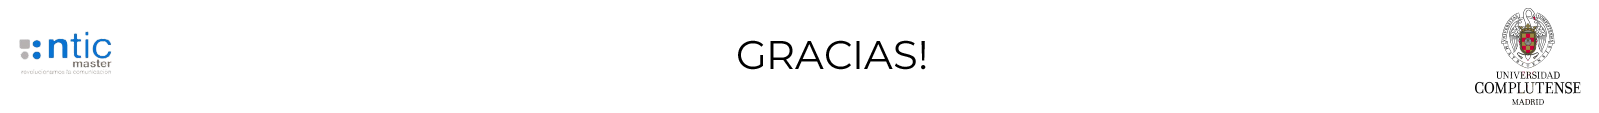